# Manitoba Wildfire Prediction - Final Project

## By: Lillian Ugulu

**Project Overview:** 
Develop a predictive model to forecast the occurrence and severity of wildfires, particularly forest fires using the Canadian Forest Fire Weather Index (FWI) System.

**Dependencies**

In [ ]:
import time
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

## Data Loading and Exploration

In [27]:
# Load dataset
mb_df = pd.read_excel('mb_data.xlsx')
mb_df.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02


In [3]:
# Get information about the dataset
mb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190557 entries, 0 to 190556
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   STATION  190557 non-null  object        
 1   TEMP     190557 non-null  float64       
 2   RH       190541 non-null  float64       
 3   WD       190537 non-null  float64       
 4   WS       190557 non-null  float64       
 5   RAIN     190554 non-null  float64       
 6   FFMC     190557 non-null  float64       
 7   DMC      190557 non-null  float64       
 8   DC       190557 non-null  float64       
 9   ISI      190556 non-null  float64       
 10  BUI      190556 non-null  float64       
 11  FWI      190556 non-null  float64       
 12  DSR      190556 non-null  float64       
 13  Date     190557 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(1)
memory usage: 20.4+ MB


In [5]:
# Describing the Data
mb_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
STATION,190557,126,GREEN LAKE,2563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,190557.0,NaN,NaN,NaN,10.854285,-57.2,2.2,14.1,21.1,58.1,13.183865
RH,190541.0,NaN,NaN,NaN,59.191213,0.0,43.0,58.0,75.0,100.0,20.400241
WD,190537.0,NaN,NaN,NaN,195.795069,0.0,113.0,209.0,285.0,360.0,103.500065
WS,190557.0,NaN,NaN,NaN,12.935509,0.0,8.0,11.8,16.5,67.0,7.071595
RAIN,190554.0,NaN,NaN,NaN,1.60486,-8.8,0.0,0.0,0.5,239.5,5.404738
FFMC,190557.0,NaN,NaN,NaN,74.75178,0.0,69.8,80.9,87.4,99.9,18.602607
DMC,190557.0,NaN,NaN,NaN,21.07517,0.0,5.5,15.4,30.3,248.1,20.669251
DC,190557.0,NaN,NaN,NaN,243.518889,-12.1,132.1,231.2,338.4,862.7,144.342453
ISI,190556.0,NaN,NaN,NaN,4.090374,-14.4,1.1,2.5,5.7,175.0,4.823863


In [6]:
# extract the day, month, and year components
mb_df['Day'] = mb_df['Date'].dt.day
mb_df['Month'] = mb_df['Date'].dt.month
mb_df['Year'] = mb_df['Date'].dt.year

mb_df.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,Day,Month,Year
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,2,3,2015
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,2,3,2015
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,2,3,2015
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,2,3,2015
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,2,3,2015


In [7]:
# Mapping day numbers to day names
day_mapping = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}
mb_df['DayN'] = mb_df['Day'].map(day_mapping)

mb_df.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,Day,Month,Year,DayN
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,2,3,2015,Tue
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,2,3,2015,Tue
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,2,3,2015,Tue
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,2,3,2015,Tue
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,2,3,2015,Tue


In [8]:
# Mapping month numbers to month names
month_mapping = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
mb_df['MonN'] = mb_df['Month'].map(month_mapping)

mb_df.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,Day,Month,Year,DayN,MonN
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,2,3,2015,Tue,Mar
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,2,3,2015,Tue,Mar
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,2,3,2015,Tue,Mar
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,2,3,2015,Tue,Mar
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,2,3,2015,Tue,Mar


C:\Users\tooch\AppData\Local\Temp\ipykernel_26676\3031825042.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MonN', data=mb_df, palette='Set2')


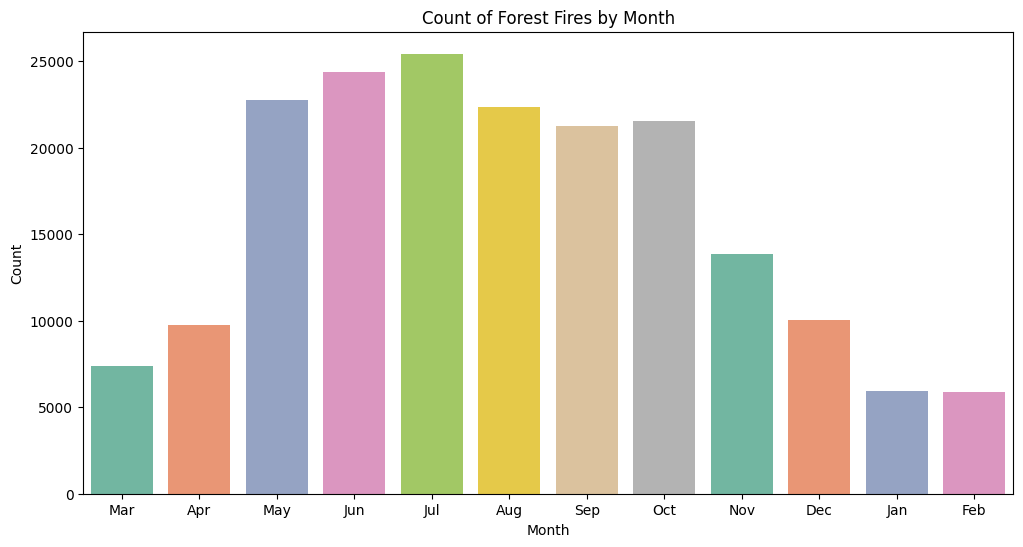

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='MonN', data=mb_df, palette='Set2')
plt.title('Count of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

NOTE: Months are arranged by season

C:\Users\tooch\AppData\Local\Temp\ipykernel_26676\1279015555.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['season'], palette='Set2')


Text(0.5, 1.0, 'Count of Forest Fires by Season')

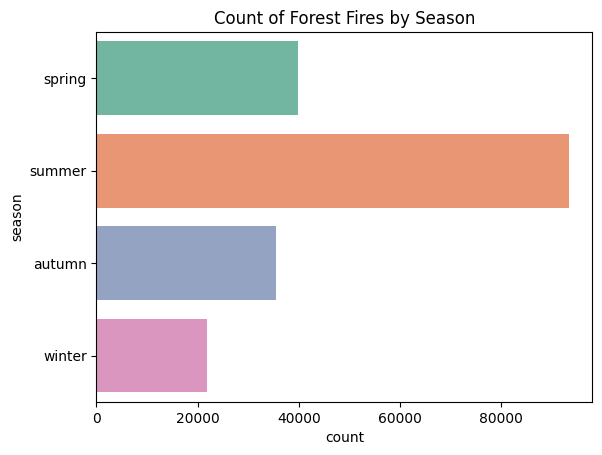

In [11]:
# dictionary of months mapping to seasons
season_dict = {'Dec' : 'winter', 'Jan' : 'winter', 'Feb' : 'winter',
              'Mar' : 'spring', 'Apr' : 'spring', 'May' : 'spring',
              'Jun' : 'summer', 'Jul' : 'summer', 'Aug' : 'summer', 'Sep' : 'summer',
              'Oct' : 'autumn', 'Nov' : 'autumn'}

# applying dictionary
df = mb_df.replace({'MonN' : season_dict})

# renaming column
df = df.rename(columns = {'MonN' : 'season'})

# visualizing data
sns.countplot(df['season'], palette='Set2')
plt.title('Count of Forest Fires by Season')

## Data Cleaning

In [18]:
# Check for missing values
mb_df.isnull().sum()

STATION     0
TEMP        0
RH         16
WD         20
WS          0
RAIN        3
FFMC        0
DMC         0
DC          0
ISI         1
BUI         1
FWI         1
DSR         1
Date        0
dtype: int64

In [28]:
# Preparing KNNImputer to replace missing values
from sklearn.impute import KNNImputer
numerical = mb_df.select_dtypes(include=[np.number, 'float']).columns.to_list()
select_data = mb_df[numerical]

In [29]:
# Applying KNNImputer
knn_imputer = KNNImputer(n_neighbors=5)
inputed_data = knn_imputer.fit_transform(select_data)
inputed_df = pd.DataFrame(inputed_data, columns=numerical)

#citation: https://medium.com/@bhanupsingh484/handling-missing-data-with-knn-imputer-927d49b09015

In [ ]:
# Updating original dataset with new dataframe
mb_df[["TEMP","RH","WD","WS","RAIN","FFMC","DMC",
         "DC","ISI","BUI","FWI","DSR"]] = inputed_df[["TEMP","RH","WD","WS","RAIN","FFMC",
                                                      "DMC","DC","ISI","BUI","FWI","DSR"]]

In [31]:
# Missing values Verification
mb_df.isnull().sum()

STATION    0
TEMP       0
RH         0
WD         0
WS         0
RAIN       0
FFMC       0
DMC        0
DC         0
ISI        0
BUI        0
FWI        0
DSR        0
Date       0
dtype: int64

In [32]:
# Checking for unique values
mb_df.nunique()

STATION     126
TEMP        748
RH          111
WD          377
WS          469
RAIN        660
FFMC        977
DMC        1441
DC         7022
ISI         569
BUI        1799
FWI         818
DSR         620
Date       2657
dtype: int64

In [33]:
# Checking for duplicates
#Checking duplicate rows
duplicates = mb_df.duplicated(subset=["TEMP","RH","WD","WS","RAIN","FFMC","DMC",
         "DC","ISI","BUI","FWI","DSR"], keep=False)

print("Duplicated rows based on Subset:\n", mb_df[duplicates])

Duplicated rows based on Subset:
                STATION  TEMP    RH    WD    WS  RAIN  FFMC   DMC    DC  ISI  \
163799     PISEW FALLS   9.6  45.0  55.0  15.0   0.0  88.4  27.6  72.0  7.2   
163822  THOMPSON (PTO)   9.6  45.0  55.0  15.0   0.0  88.4  27.6  72.0  7.2   

         BUI   FWI  DSR       Date  
163799  28.2  13.0  2.6 2023-05-23  
163822  28.2  13.0  2.6 2023-05-23  


**Observation:** Although they are duplicates, however, they would not be removed as the information is from two different stations, and based on further research, in some occassion, reports are retrieved from the closest station which is demonstrated in the above.

## Station Exploration

In [34]:
# Data distribution bu station
mb_df["STATION"].value_counts(normalize=True)

STATION
GREEN LAKE                    0.013450
WOODRIDGE                     0.013335
FALCON LAKE                   0.013266
FLANDERS LAKE                 0.013245
BISSETT                       0.013224
                                ...   
LAURIE RIVER                  0.000934
SNOW LAKE (POW) (POW)         0.000079
DEEP LAKE (RMNP) (RMNP)       0.000073
KIPPANS MILL (RMNP) (RMNP)    0.000073
YORKTON (PRJ)                 0.000073
Name: proportion, Length: 126, dtype: float64

In [ ]:
# Unification of station names as there are updates/miss spellings to some names
name_mapping = {
    'OAK POINT MARINE WOJ': 'OAK POINT MARINE (WOJ)',
    'OAKPOINT MRN (WOJ)': 'OAK POINT MARINE (WOJ)',
    'OAK POINT MARINE W0J': 'OAK POINT MARINE (WOJ)',
    'SNOW LAKE':'SNOW LAKE (POW)',
    'SNOW LAKE (POW)': 'SNOW LAKE (POW)',
    'GEORGE ISLAND (WWS)':'GEORGE ISLAND (WWS)',
    'LAKE ST GEORGE': 'GEORGE ISLAND (WWS)',
    'KIPPANS MILL (RMNP)':'KIPPANS MILL (RMNP)',
    'KIPPENS MILL':'KIPPANS MILL (RMNP)',
    'DEEP LAKE': 'DEEP LAKE (RMNP)',
    'DEEP LAKE (RMNP)':'DEEP LAKE (RMNP)',
    'CYPRESS RIVER': 'CYPRESS RIVER (POY)',
    'CYPRESS RIVER (POY)':'CYPRESS RIVER (POY)',
    'DEERWOOD (XDW)':'DEERWOOD (XDW)',
    'DEERWOOD':'DEERWOOD (XDW)',
    'GARYS MEADOW': 'GARYS MEADOW',
    "GARY'S MEADOW":'GARYS MEADOW',
    'MINITONAS':'MINITONAS AG',
    'MINITONAS AG':'MINITONAS AG',
    'STEAD': 'STEAD AG',
    'STEAD AG':'STEAD AG',
    'WILSON CR WEIR (WOO)':'WILSON CREEK (WOO)',
    'WILSON CREEK (WOO)': 'WILSON CREEK (WOO)'
    }

In [36]:
# Updating station names
mb_df['STATION'] = mb_df['STATION'].map(name_mapping).fillna(mb_df['STATION'])

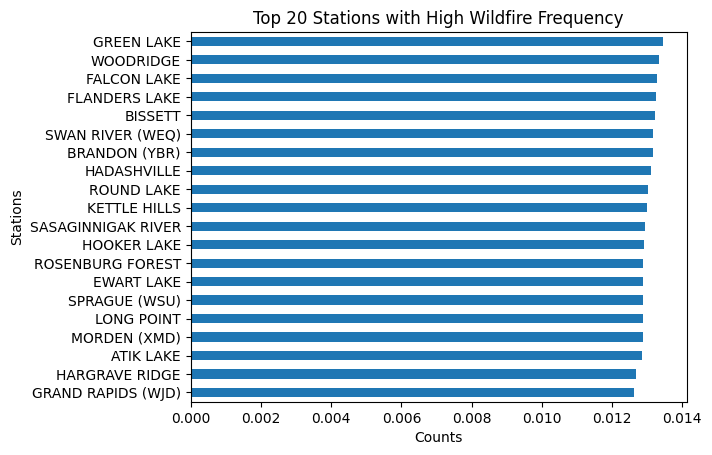

In [37]:
# Bar plot for top 20 stations with the highest wildfire frequency
top_stations = mb_df["STATION"].value_counts(normalize=True).head(20)
top_stations.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Stations with High Wildfire Frequency')
plt.xlabel('Counts')
plt.ylabel('Stations')
plt.show()

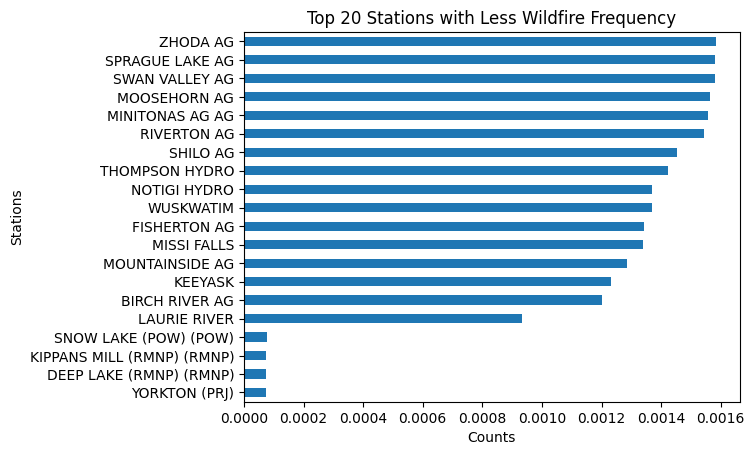

In [38]:
# Bar plot for top 20 stations with the lowest wildfire frequency
top_stations = mb_df["STATION"].value_counts(normalize=True).tail(20)
top_stations.sort_values(ascending=True).plot.barh() 
plt.title('Top 20 Stations with Less Wildfire Frequency')
plt.xlabel('Counts')
plt.ylabel('Stations')
plt.show()

In [39]:
# Save cleaned data
mb_df.to_csv('mb_data_clean.csv', index=False)

## Data Stats Exploration

In [40]:
mb_df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
STATION,190557,126,GREEN LAKE,2563,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TEMP,190557.0,NaN,NaN,NaN,10.854285,-57.2,2.2,14.1,21.1,58.1,13.183865
RH,190557.0,NaN,NaN,NaN,59.190846,0.0,43.0,58.0,75.0,100.0,20.399719
WD,190557.0,NaN,NaN,NaN,195.795691,0.0,113.0,209.0,285.0,360.0,103.495316
WS,190557.0,NaN,NaN,NaN,12.935509,0.0,8.0,11.8,16.5,67.0,7.071595
RAIN,190557.0,NaN,NaN,NaN,1.604851,-8.8,0.0,0.0,0.5,239.5,5.404698
FFMC,190557.0,NaN,NaN,NaN,74.75178,0.0,69.8,80.9,87.4,99.9,18.602607
DMC,190557.0,NaN,NaN,NaN,21.07517,0.0,5.5,15.4,30.3,248.1,20.669251
DC,190557.0,NaN,NaN,NaN,243.518889,-12.1,132.1,231.2,338.4,862.7,144.342453
ISI,190557.0,NaN,NaN,NaN,4.090368,-14.4,1.1,2.5,5.7,175.0,4.823851


### Outliers

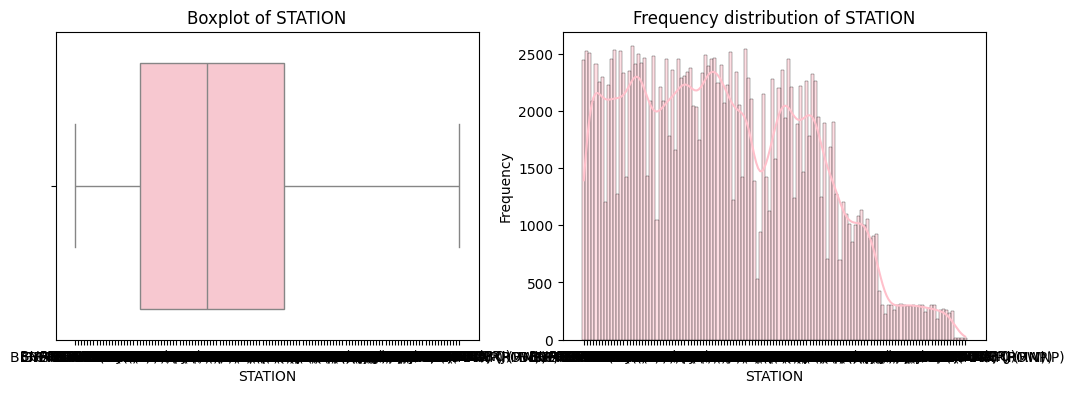

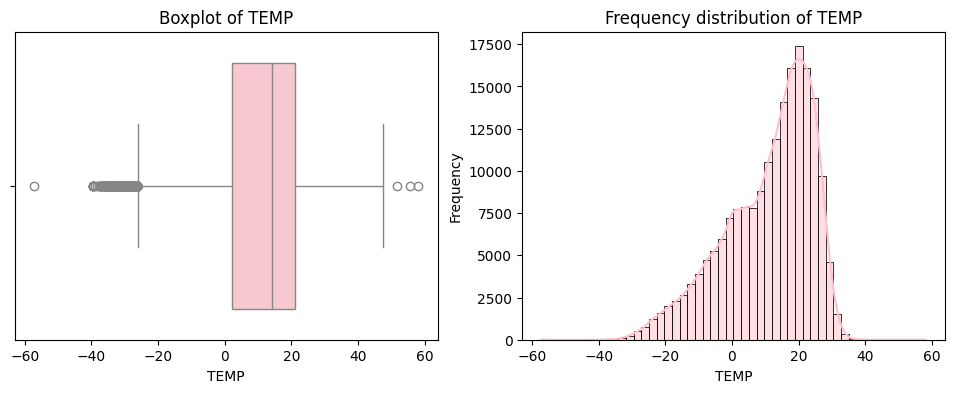

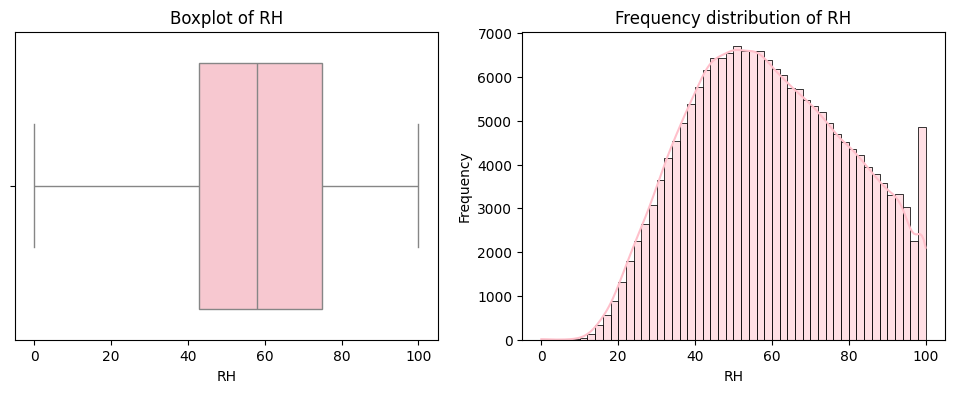

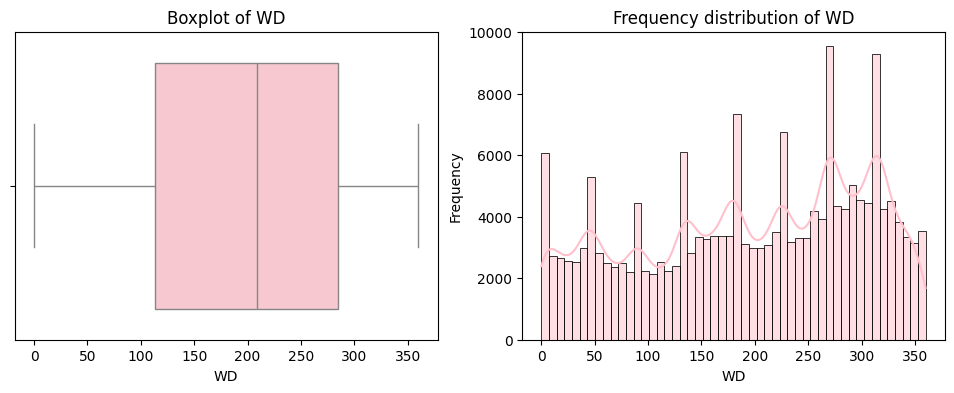

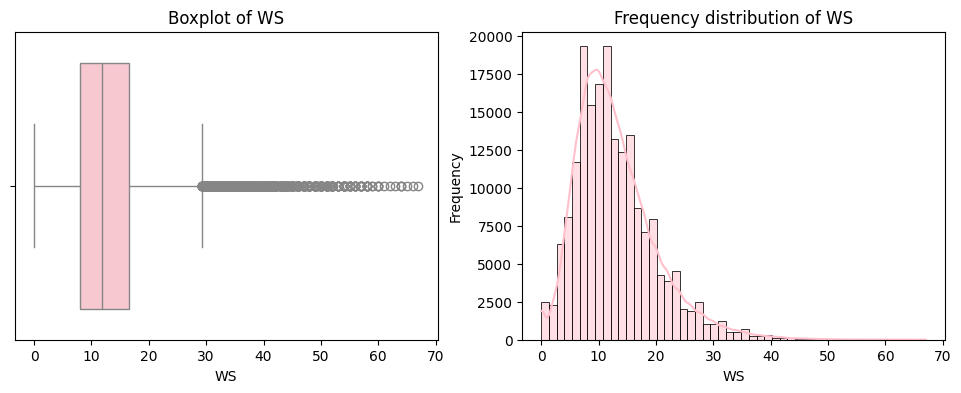

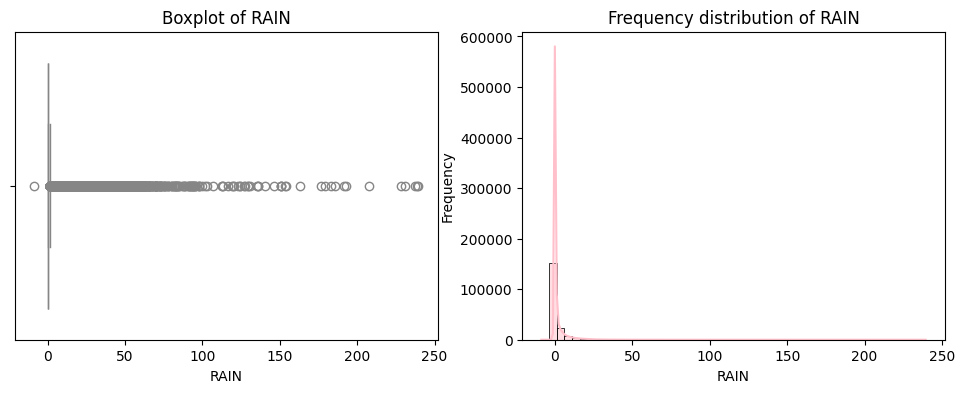

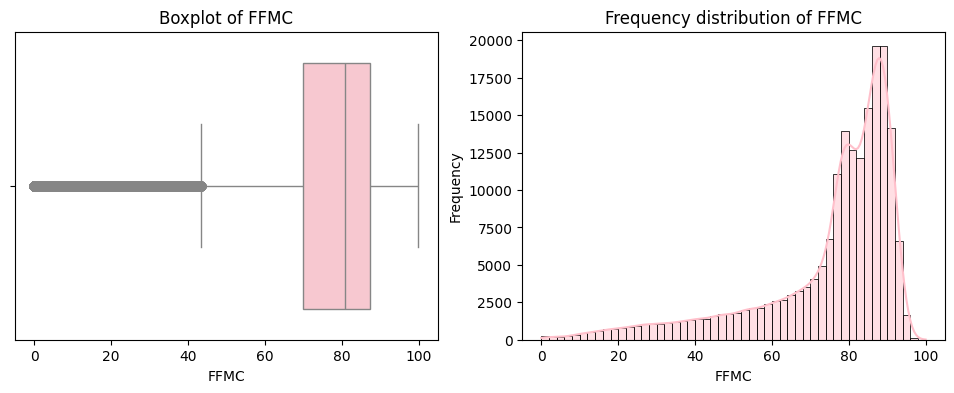

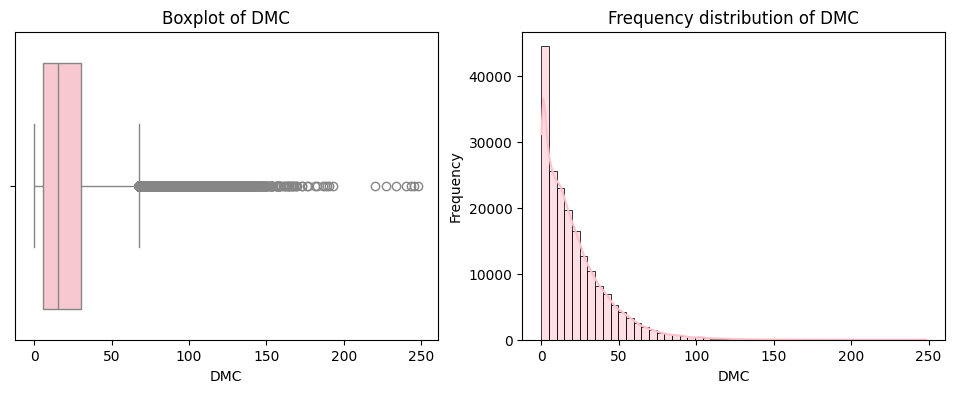

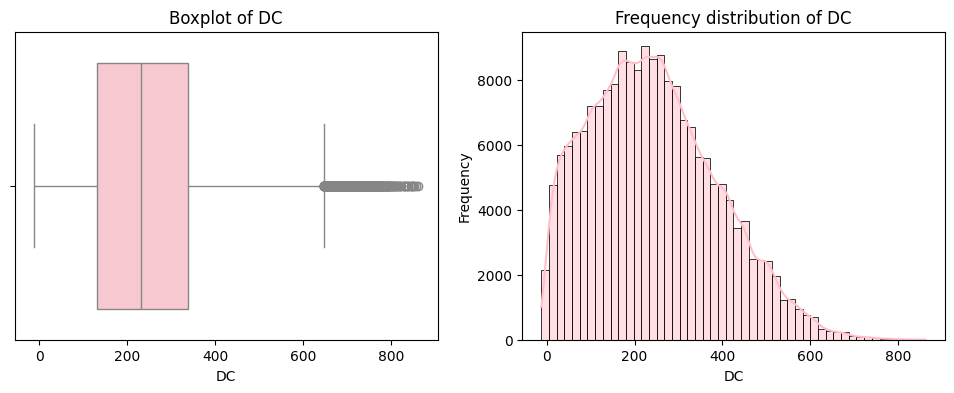

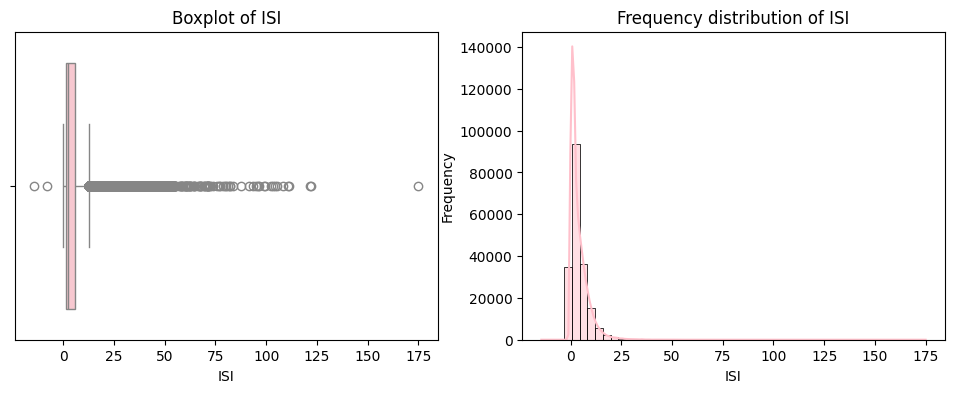

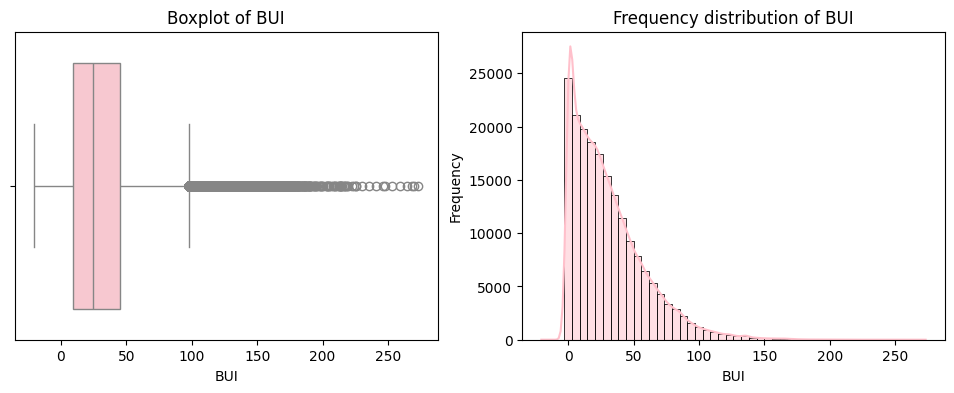

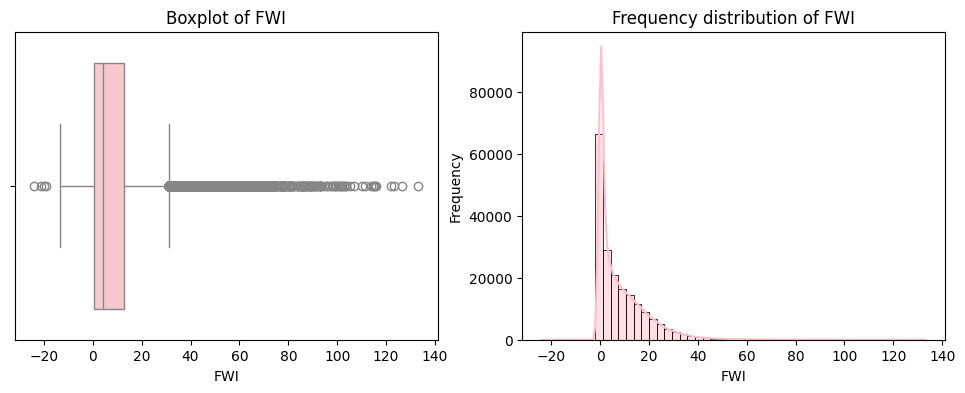

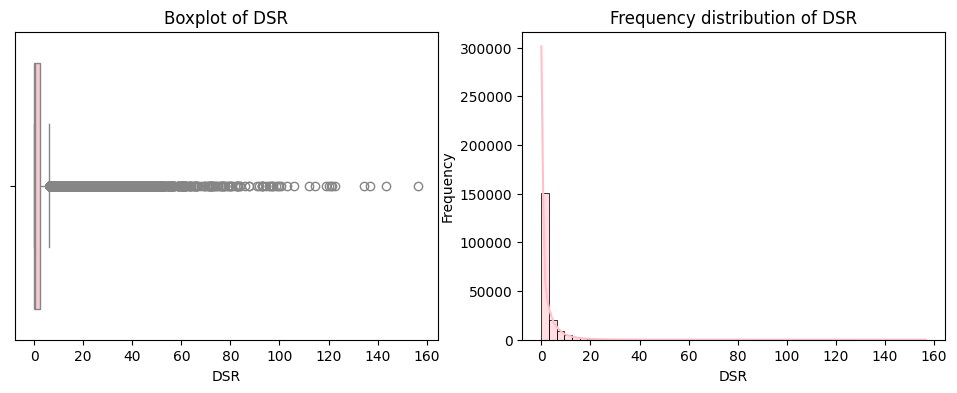

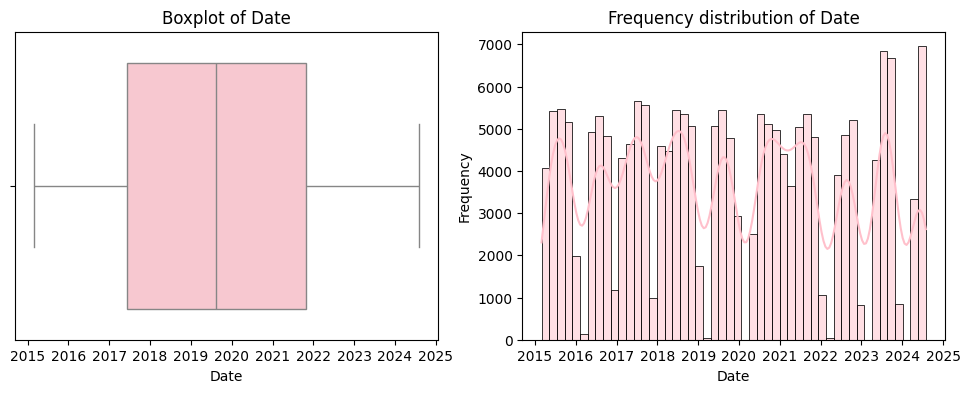

In [41]:
# Checking for outliers and frequency
for column in mb_df.columns:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
    sns.boxplot(mb_df[column], orient='h', color='pink', ax=ax1)
    ax1.set_xlabel(f'{column}')
    ax1.set_title(f'Boxplot of {column}')

    sns.histplot(mb_df[column], bins=50, color='pink', kde=True, ax=ax2)
    ax2.set_xlabel(f'{column}')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'Frequency distribution of {column}')

**NOTE:** Due to the nature of the data, the outliers would not be removed in order to avoid unknown bias.

### Feature Correlation

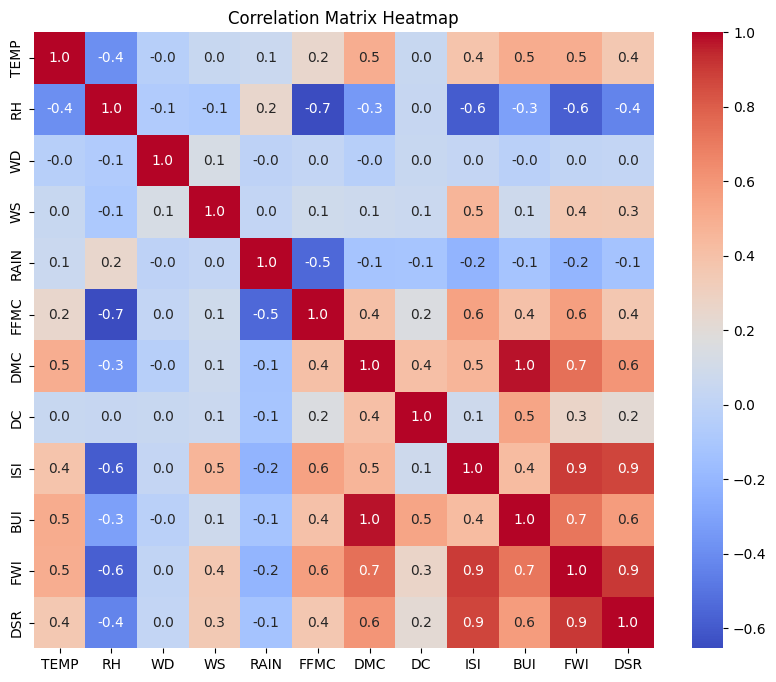

In [45]:
# feature correlations examination
corr_matrix = mb_df[['TEMP','RH','WD','WS','RAIN','FFMC','DMC','DC','ISI','BUI','FWI','DSR']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f')
plt.title("Correlation Matrix Heatmap")
plt.show()

**Observation:** Based the correlation matrix above, WD, DC, and DSR would be dropped. Reasons are that WD and DC both have a weak correlation to the target FWI, and DSR is dropped as it is highly correlated to the target and could result in a bias where the model relies only on this feature.

## Fire Weather Index Exploration

**NOTE:** The FWI range for this project is categorized based on the information below, gotten from https://cwfis.cfs.nrcan.gc.ca/maps/fw?type=fwi and https://cwfis.cfs.nrcan.gc.ca/maps/fw

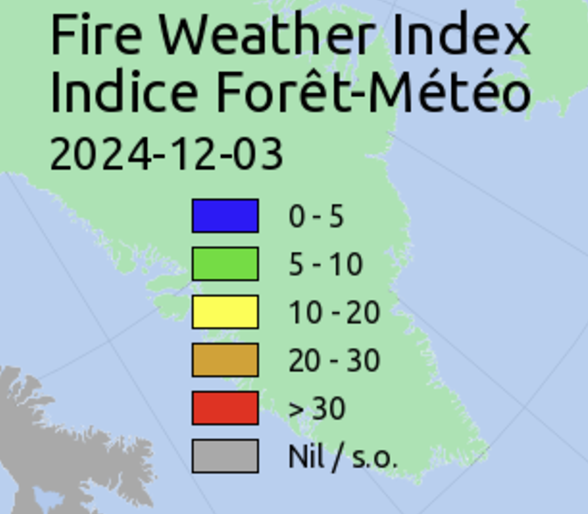  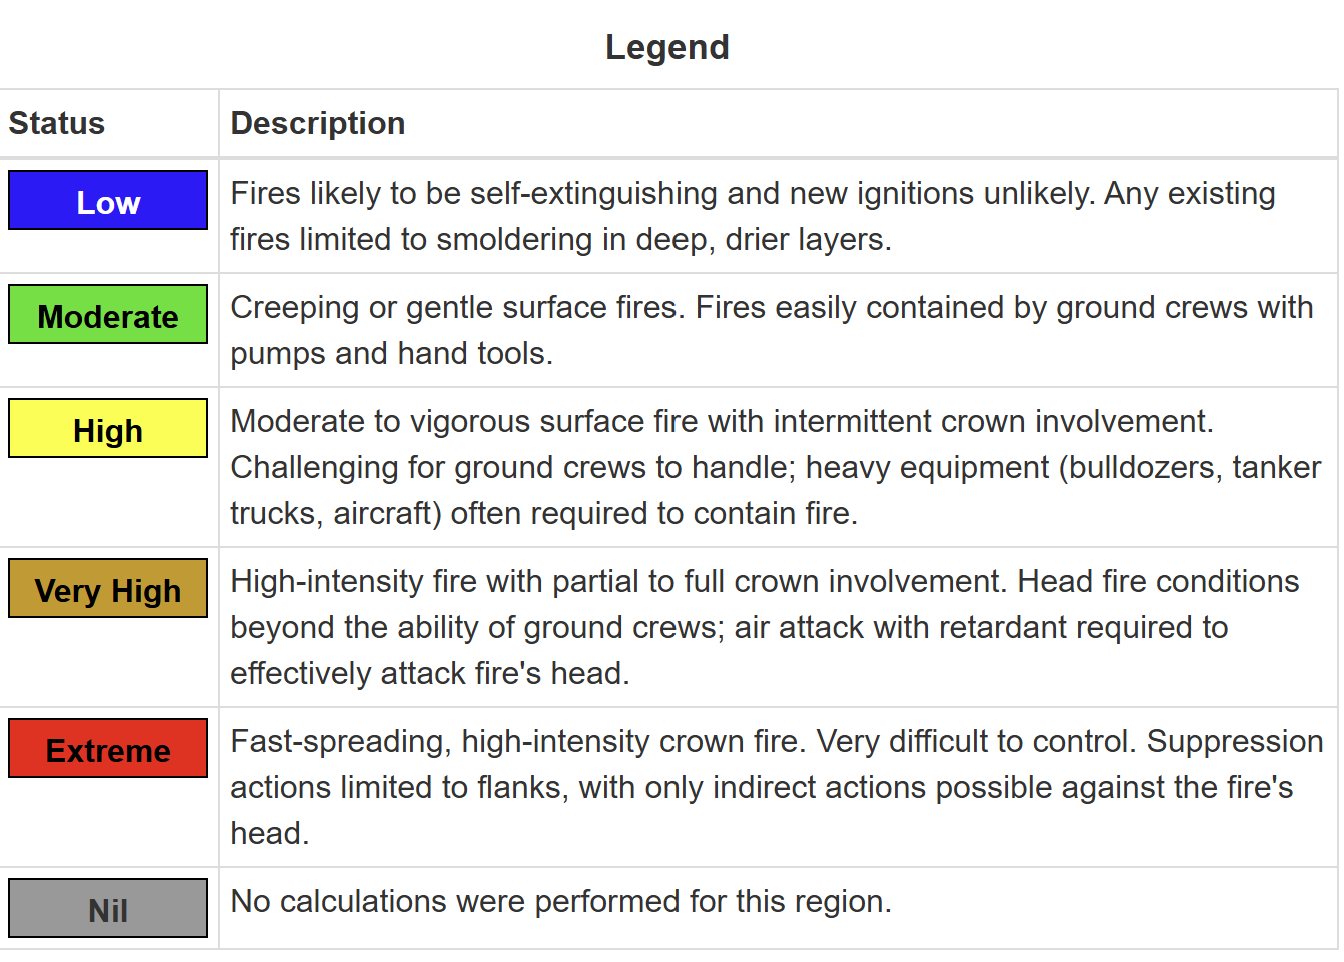

### Classifying the FWI Levels

In [46]:
# Define the bins and labels for the classification
bins = [-np.inf, 5, 10, 20, 30, np.inf]
labels = ['Low', 'Moderate', 'High', 'Very High', 'Extreme']

# Create a new column with the categorized FWI
mb_df['FWI_Class'] = pd.cut(mb_df['FWI'], bins=bins, labels=labels, include_lowest=True)

# Display the DataFrame with the new target class
mb_df.head()

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Date,FWI_Class
0,ATIK LAKE,-3.7,44.0,225.0,13.2,0.0,85.2,0.1,214.3,4.2,0.2,0.9,0.0,2015-03-02,Low
1,BISSETT,-4.3,47.0,225.0,18.9,2.8,62.3,0.0,171.5,1.2,0.2,0.3,0.0,2015-03-02,Low
2,BRANDON (YBR),-6.8,97.0,165.0,15.0,0.0,76.4,36.9,442.6,1.8,61.1,6.2,0.7,2015-03-02,Moderate
3,BERENS RIVER (WCF),-9.3,68.0,168.0,17.0,0.0,79.9,0.1,90.1,2.7,0.2,0.6,0.0,2015-03-02,Low
4,BURNTWOOD LAKE,-7.6,54.0,232.0,11.3,0.0,83.7,6.9,236.3,3.1,12.9,3.8,0.3,2015-03-02,Low


In [47]:
# FWI Classifcation Frequency table
fwi_freq = mb_df["FWI_Class"].value_counts()
fwi_freq = pd.DataFrame({"Classes": fwi_freq.keys(), 'Frequency': fwi_freq.values})
fwi_freq = fwi_freq.sort_values(by="Classes")
fwi_freq['Relative_Frequency'] = fwi_freq['Frequency']/fwi_freq['Frequency'].sum()
fwi_freq

,Classes,Frequency,Relative_Frequency
0,Low,101005,0.530051
2,Moderate,29109,0.152757
1,High,37196,0.195196
3,Very High,15581,0.081766
4,Extreme,7666,0.040229


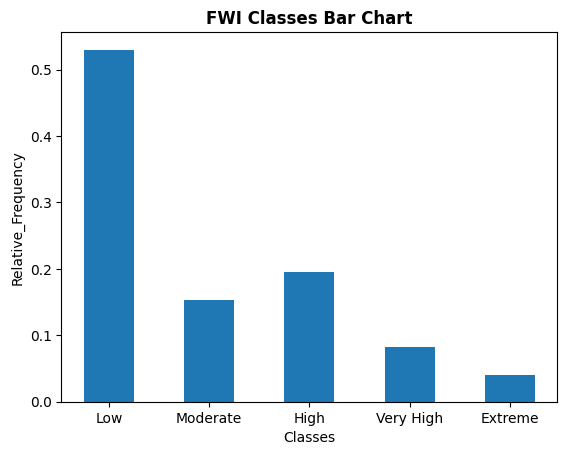

In [49]:
# Bar plot for FWI Classes
plt.bar(fwi_freq.Classes,fwi_freq.Relative_Frequency, width = 0.5 )

#Adding the labels to the bar chart
plt.xlabel('Classes')
plt.ylabel('Relative_Frequency')
plt.title('FWI Classes Bar Chart', fontweight = 'bold')
plt.show()

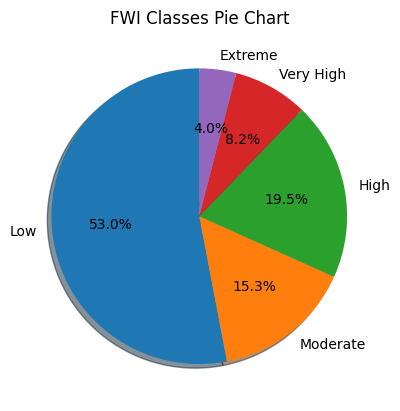

In [50]:
# Pie chart for FWI Classes
plt.pie(fwi_freq['Relative_Frequency'], labels = fwi_freq['Classes'],
        autopct='%1.1f%%', startangle =90, shadow=True)
plt.title('FWI Classes Pie Chart')
plt.show()

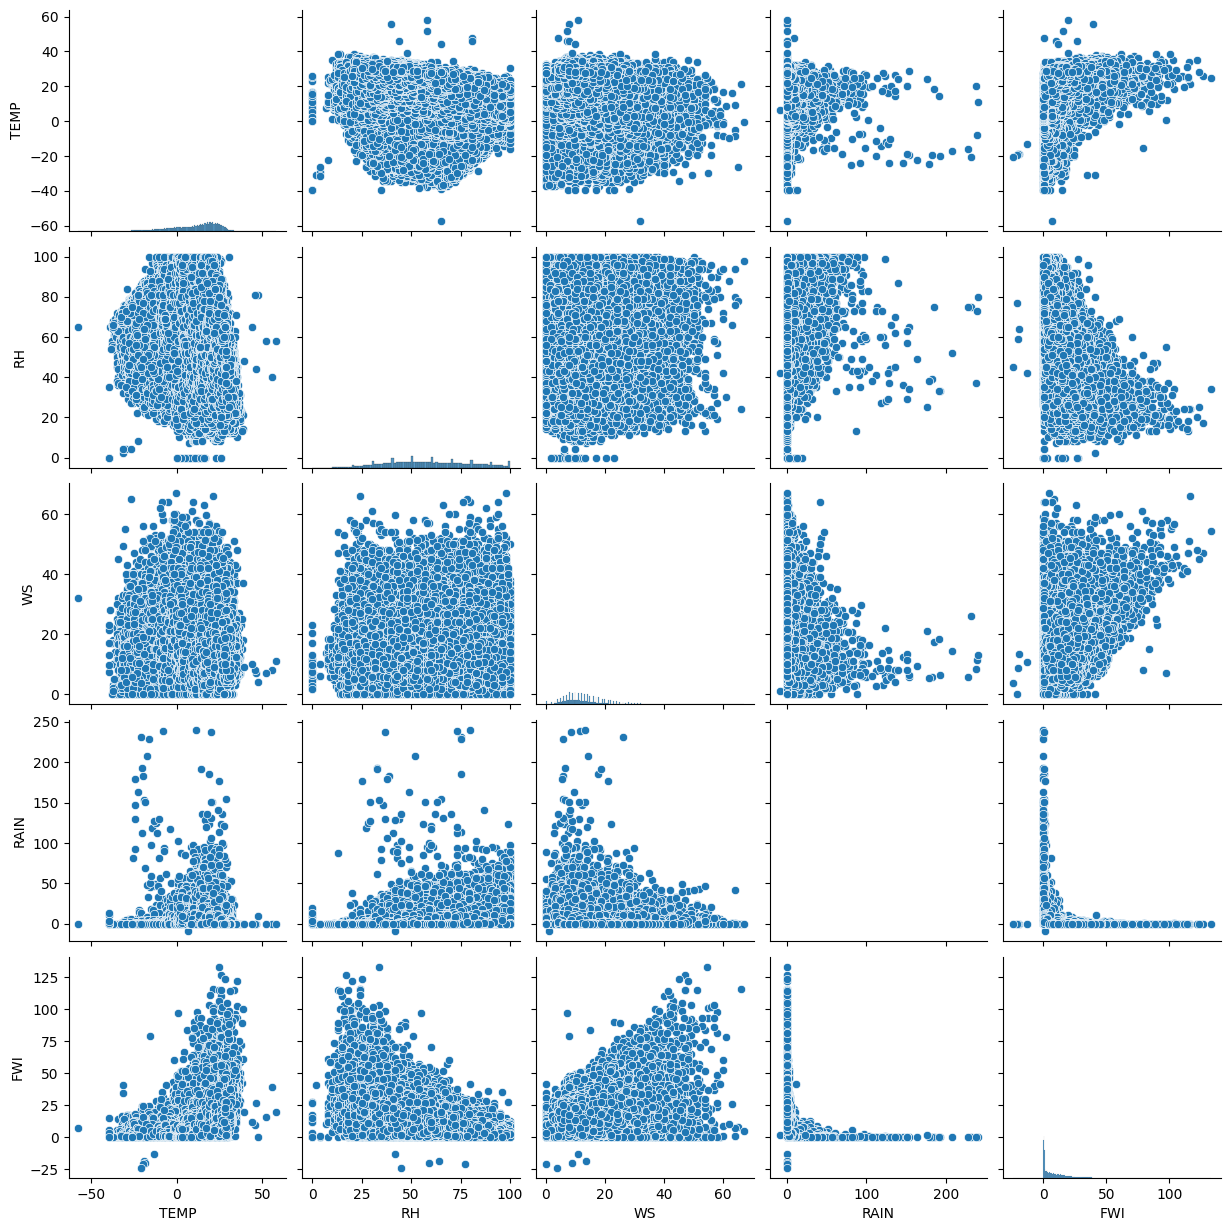

In [ ]:
# Correlation weather features to target variable (FWI)
sns.pairplot(data = mb_df, vars=['TEMP','RH','WS','RAIN','FWI']) 
plt.show()

## Data Preparation

Train-Test Split

In [52]:
X = mb_df[["TEMP","RH", "WS","RAIN","FFMC","DMC", "ISI","BUI"]]

y = mb_df["FWI"]

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Normalization

In [53]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

## Model Training & Evaluation

### Random Forest Regressor

In [ ]:
# Build model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
rf_training_time = time.time() - start_time

# Make predictions
start_time = time.time()
rf_pred = rf.predict(X_test)
rf_testing_time = time.time() - start_time

# Evaluate model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, rf_pred)


print("Regression Metrics for Random Forest Regressor:")
print(f"Mean Squared Error (MSE): {rf_mse:.2f}")
print(f"R-squared (R²): {rf_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rf_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {rf_mae:.2f}")
print(f"Training time: {rf_training_time:.2f}")
print(f"Testing time: {rf_testing_time:.2f}")

Regression Metrics for Random Forest Regressor:
Mean Squared Error (MSE): 0.21
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.46
Mean Absolute Error (MAE): 0.06
Training time: 97.32
Testing time: 2.39


### Gradient Boosting Regressor

In [ ]:
# GBR parameters
params = {
    "n_estimators": 200,
    "max_depth": 8,
    "min_samples_split": 4,
    "learning_rate": 0.05,
    "random_state": 42,
    "min_samples_leaf": 1,
    "subsample": 0.8,
    "n_iter_no_change": 10,
    "validation_fraction": 0.1
}

# Build model
gb = GradientBoostingRegressor(**params)
start_time = time.time()
gb.fit(X_train, y_train)
gb_training_time = time.time() - start_time

# Make predictions
start_time = time.time()
gb_pred = gb.predict(X_test)
gb_testing_time = time.time() - start_time

# Evaluate model
gb_mse = mean_squared_error(y_test, gb_pred)
gb_r2 = r2_score(y_test, gb_pred)
gb_rmse = np.sqrt(gb_mse)
gb_mae = mean_absolute_error(y_test, gb_pred)


print("Regression Metrics for Gradient Boosting Regressor:")
print(f"Mean Squared Error (MSE): {gb_mse:.2f}")
print(f"R-squared (R²): {gb_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {gb_mse:.2f}")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"Training time: {gb_training_time:.2f}")
print(f"Testing time: {gb_testing_time:.2f}")

Regression Metrics for Gradient Boosting Regressor:
Mean Squared Error (MSE): 0.22
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.22
Mean Absolute Error (MAE): 0.07
Training time: 39.86
Testing time: 0.37


### Decision Tree Regressor

In [ ]:
# Build model
dt = DecisionTreeRegressor(random_state=42)
start_time = time.time()
dt.fit(X_train, y_train)
dt_training_time = time.time() - start_time


# Make predictions
start_time = time.time()
dt_pred = dt.predict(X_test)
dt_testing_time = time.time() - start_time

# Evaluate model
dt_mse = mean_squared_error(y_test, dt_pred)
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, dt_pred)


print("Regression Metrics for Decision Tree Regressor:")
print(f"Mean Squared Error (MSE): {dt_mse:.2f}")
print(f"R-squared (R²): {dt_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {dt_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {dt_mae:.2f}")
print(f"Training time: {dt_training_time:.2f}")
print(f"Testing time: {dt_testing_time:.2f}")

Regression Metrics for Decision Tree Regressor:
Mean Squared Error (MSE): 0.45
R-squared (R²): 1.00
Root Mean Squared Error (RMSE): 0.67
Mean Absolute Error (MAE): 0.09
Training time: 0.69
Testing time: 0.01


### KNN Regressor

In [ ]:
# Build model
knn = KNeighborsRegressor(n_neighbors=5)
start_time = time.time()
knn.fit(X_train, y_train)
knn_training_time = time.time() - start_time

# Make predictions
start_time = time.time()
knn_pred = knn.predict(X_test)
knn_testing_time = time.time() - start_time

# Evaluate model
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(knn_mse)
knn_mae = mean_absolute_error(y_test, knn_pred)


print("Regression Metrics for KNN Regressor:")
print(f"Mean Squared Error (MSE): {knn_mse:.2f}")
print(f"R-squared (R²): {knn_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {knn_mse:.2f}")
print(f"Mean Absolute Error (MAE): {knn_mae:.2f}")
print(f"Training time: {knn_training_time:.2f}")
print(f"Testing time: {knn_testing_time:.2f}")

Regression Metrics for KNN Regressor:
Mean Squared Error (MSE): 1.15
R-squared (R²): 0.99
Root Mean Squared Error (RMSE): 1.15
Mean Absolute Error (MAE): 0.54
Training time: 0.21
Testing time: 1.94


### Multivariable Regression

In [61]:
# Build model
import statsmodels.formula.api as sm
start_time = time.time()
models = sm.ols('FWI ~ TEMP + RH + WS + RAIN + FFMC + DMC + ISI + BUI', mb_df).fit()
mr_training_time = time.time() - start_time
print(models.summary())

                            OLS Regression Results                            
Dep. Variable:                    FWI   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 4.542e+05
Date:                Tue, 03 Dec 2024   Prob (F-statistic):               0.00
Time:                        17:12:22   Log-Likelihood:            -4.2540e+05
No. Observations:              190557   AIC:                         8.508e+05
Df Residuals:                  190548   BIC:                         8.509e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3007      0.051     -5.949      0.0

In [62]:
# Make predictions
start_time = time.time()
mr_pred = models.predict(mb_df)
mr_testing_time = time.time() - start_time

# Evaluate model
mr_mae = mean_absolute_error(y, mr_pred)
mr_r2 = models.rsquared
mr_mse = mean_squared_error(y, mr_pred)
mr_rmse = np.sqrt(mean_squared_error(y, mr_pred))


print("Regression Metrics for Multivariable Regression:")
print(f"Mean Squared Error (MSE): {mr_mse:.2f}")
print(f"R-squared (R²): {mr_r2:.2f}")
print(f"Root Mean Squared Error (RMSE): {mr_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mr_mae:.2f}")
print(f"training time:{mr_training_time:.2f}")
print(f"Testing time: {mr_testing_time:.2f}")

Regression Metrics for Multivariable Regression:
Mean Squared Error (MSE): 5.09
R-squared (R²): 0.95
Root Mean Squared Error (RMSE): 2.26
Mean Absolute Error (MAE): 1.39
training time:0.11
Testing time: 0.05


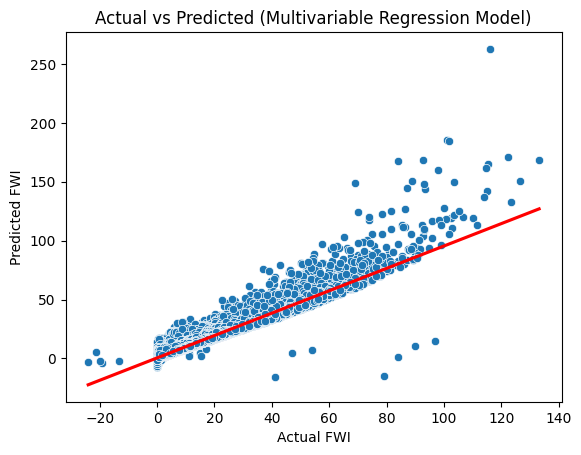

In [63]:
# Plotting Actual vs Predicted Multivarial model
sns.scatterplot(x=y, y=mr_pred)
sns.regplot(x=y, y=mr_pred, scatter=False, color='r')
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted (Multivariable Regression Model)')
plt.show()

**Observation:** This scatter plot visualizes the relationship between actual Fire Weather Index (FWI) values and predicted FWI values using a multivariable regression model. It suggests a relatively strong alignment between actual and predicted values indicating that the model performs well overall, though some outliers are present, especially at higher FWI values.

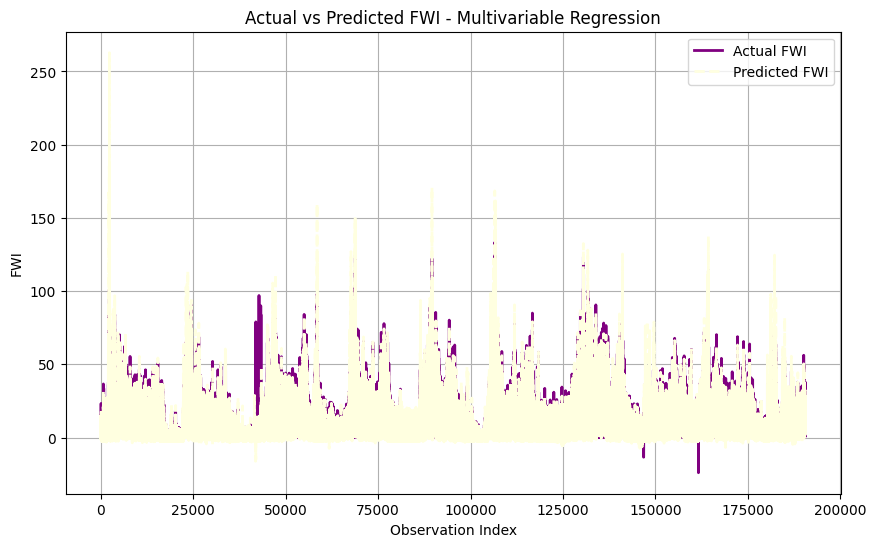

In [71]:
# Actual values
actual_mr = mb_df['FWI']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(actual_mr)), actual_mr, label='Actual FWI', color='purple', linewidth=2)
plt.plot(np.arange(len(mr_pred)), mr_pred, label='Predicted FWI', color='lightyellow', linewidth=2, linestyle='--')

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('FWI')
plt.title('Actual vs Predicted FWI - Multivariable Regression')
plt.legend()
plt.grid(True)
plt.show()

**Observation:** This line plot compares the actual Fire Weather Index (FWI) values (purple solid line) with the predicted FWI values (lightyellow dashed line) across a range of observations. The predicted values generally follow the trend of the actual values, indicating that the model captures the overall patterns in the data. However, there are noticeable discrepancies in certain areas, such as peaks and troughs, suggesting some limitations in the model's precision for extreme FWI values.

### Polynomial Regression

In [73]:
# Generate polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
start_time = time.time()
# Transform the input data to include polynomial features
X_poly = poly.fit_transform(X)

# Fit Linear model with poly
poly_model = LinearRegression()
poly_model.fit(X_poly, y)
poly_training_time = time.time() - start_time

# Make predictions
start_time = time.time()
poly_pred = poly_model.predict(X_poly)
poly_testing_time = time.time() - start_time

# Evaluate the model
poly_mse = mean_squared_error(y, poly_pred)
poly_r2 = r2_score(y, poly_pred)
poly_rmse = np.sqrt(mean_squared_error(y, poly_pred))
poly_mae = mean_absolute_error(y, poly_pred)


print("Regression Metrics for Polynomial Regression:")
print(f'Mean Squared Error (MSE): {poly_mse:.2f}')
print(f'R-squared (R²): {poly_r2:.2f}')
print(f"Root Mean Squared Error (RMSE): {poly_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {poly_mae:.2f}")
print(f"training time: {poly_training_time:.2f}")
print(f"Testing time: {poly_testing_time:.2f}")

Regression Metrics for Polynomial Regression:
Mean Squared Error (MSE): 0.58
R-squared (R²): 0.99
Root Mean Squared Error (RMSE): 0.76
Mean Absolute Error (MAE): 0.41
training time: 1.00
Testing time: 0.01


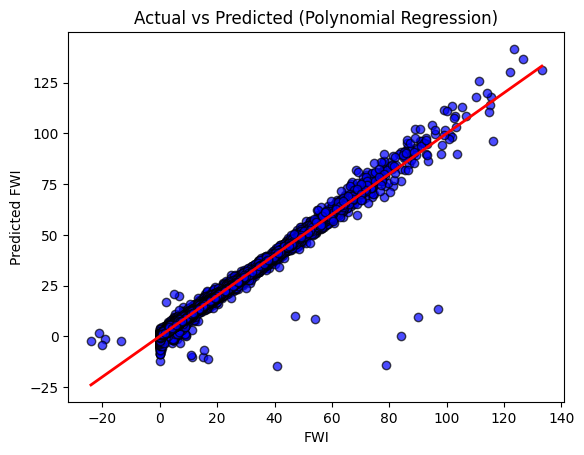

In [74]:
# Plotting Actual vs Predicted Polynomial 
plt.scatter(y, poly_pred, edgecolor='k', facecolors='b', alpha=0.7)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linewidth=2)
plt.xlabel('FWI')
plt.ylabel('Predicted FWI')
plt.title('Actual vs Predicted (Polynomial Regression)')
plt.show()

**Observation:** This scatter plot visualizes the relationship between actual Fire Weather Index (FWI) values and predicted FWI values using a polynomial regression model. The points which are closely clustered along the red line, indicates a strong alignment and suggestes that the polynomial regression model performs well in capturing the relationship between the variables, with only minor deviations or outliers.

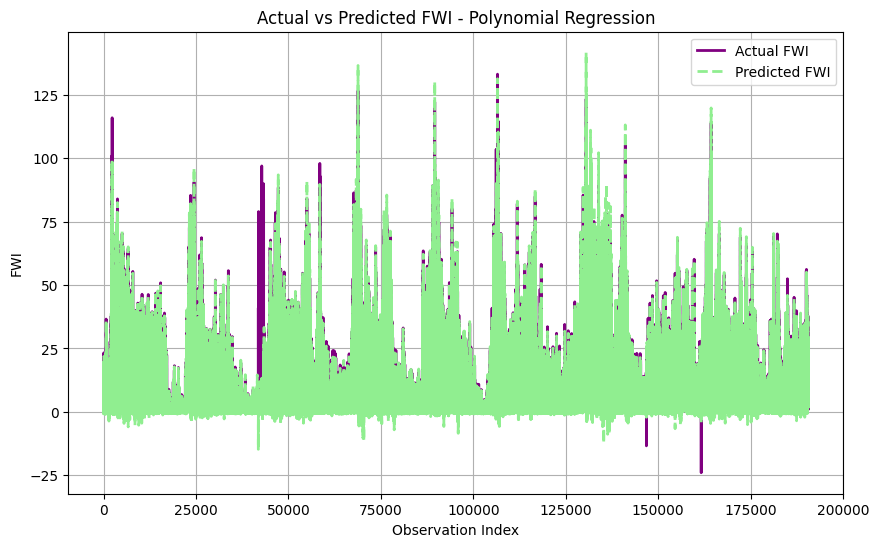

In [77]:
# Actual values
actual_pr = mb_df['FWI']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(actual_pr)), actual_pr, label='Actual FWI', color='purple', linewidth=2)
plt.plot(np.arange(len(poly_pred)), poly_pred, label='Predicted FWI', color='lightgreen', linewidth=2, linestyle='--')

# Add labels and title
plt.xlabel('Observation Index')
plt.ylabel('FWI')
plt.title('Actual vs Predicted FWI - Polynomial Regression')
plt.legend()
plt.grid(True)
plt.show()

**Observation:** This model captures the relationship between the variables more accurately than models with larger deviations (e.g., multivariable linear regression), which indicates that there are fewer discrepancies between actual and predicted Fire Weather Index (FWI) values.

### Cross Validation

In [ ]:
# Assess model performance using cross-validation
cv_scores = cross_val_score(poly_model, X_poly, y, cv=5)
print(f'Polynomial Regression Cross Validation Accuracy: {cv_scores.mean():.3f}')
print(f"Standard deviation of cross validation score: {cv_scores.std():.3f}")

Polynomial Regression Cross Validation Accuracy: 0.992
Standard deviation of cross validation score: 0.004


### Evaluation Summary

In [ ]:
# Evaluation score of all models
acc_score = pd.DataFrame({
    'Mean Squared Error (MSE)': [rf_mse, gb_mse, dt_mse, knn_mse, mr_mse, poly_mse],
    'R-squared (R²)': [rf_r2, gb_r2, dt_r2, knn_r2, mr_r2, poly_r2],
    'Root Mean Squared Error (RMSE)': [rf_rmse, gb_rmse, dt_rmse, knn_rmse, mr_rmse, poly_rmse],
    'Mean Absolute Error (MAE)': [rf_mae, gb_mae, dt_mae, knn_mae, mr_mae, poly_mae],
    'Training Time': [rf_training_time, gb_training_time, dt_training_time, knn_training_time, mr_testing_time, poly_training_time ],
    'Testing Time': [rf_testing_time, gb_testing_time, dt_testing_time, knn_testing_time, mr_testing_time, poly_testing_time ]},
    index=[ 'Random Forest', 'Gradient Boosting', 'Decision Tree', 'KNN Regressor', 'Multivariable Regressor', 'Polynomial Regression'])

acc_score

,Mean Squared Error (MSE),R-squared (R²),Root Mean Squared Error (RMSE),Mean Absolute Error (MAE),Training Time,Testing Time
Random Forest,0.214468,0.997900,0.463106,0.057213,97.323113,2.390369
Gradient Boosting,0.216103,0.997884,0.464869,0.066314,39.858551,0.366159
Decision Tree,0.446107,0.995633,0.667912,0.089513,0.692484,0.011095
KNN Regressor,1.153215,0.988710,1.073878,0.535503,0.210785,1.935750
Multivariable Regressor,5.088462,0.950168,2.255762,1.393147,0.048578,0.048578
Polynomial Regression,0.584328,0.994278,0.764414,0.411430,1.003063,0.012857


## Testing Models Based on Prediction

In [102]:
# Using weather data of Sept 31 2024 from Manitoba Website - Natural Resources and Northern Development
# link: https://www.gov.mb.ca/conservation_fire/Wx-Report/index.html

data_pred = pd.read_csv('manitoba_fire_weather_data.csv')

### Multivariable Regression Prediction

In [87]:
# Make prediction for Multiple Regression
pred_data=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                     "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"],
                     "FWI":data_pred["FWI"]})
start_time = time.time()
pred_mr = models.predict(pred_data)
mr_testing_time = time.time() - start_time
mr_prediction = data_pred.copy()
mr_prediction["Predicted FWI"] = pred_mr
mr_prediction.head(10)

,STATION,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Predicted FWI
0,ATIK LAKE,10.7,50.0,254.0,13.1,6.8,44.2,13.5,456.4,0.1,25.2,0.1,0.0,1.689197
1,BEAUSEJOUR AG,13.8,36.0,248.0,34.8,0.2,88.8,23.5,414.7,20.7,41.1,33.3,13.5,34.292405
2,BERENS RIVER (WCF),12.5,49.0,261.0,33.0,5.2,68.1,16.5,244.7,3.1,28.3,6.3,0.7,6.314187
3,BIRCH RIVER AG,12.6,47.0,208.0,20.5,0.3,86.3,44.5,624.4,7.0,75.6,21.4,6.2,18.697273
4,BISSETT,15.4,34.0,264.0,7.6,0.3,89.5,24.0,191.0,5.8,36.5,12.5,2.4,11.884004
5,BRANDON (YBR),13.6,35.0,219.0,30.0,0.0,88.9,35.7,477.4,16.4,60.1,34.2,14.1,30.662038
6,BURNTWOOD LAKE,10.0,48.0,288.0,18.2,20.0,44.3,8.7,437.9,0.2,16.5,0.1,0.0,0.349577
7,CACHE LAKE,11.8,40.0,225.0,14.1,0.5,86.7,26.9,312.5,5.4,44.3,13.1,2.6,12.141977
8,CARBERRY (WZE),13.8,32.0,239.0,20.0,0.0,89.5,32.1,402.6,10.8,53.6,24.3,7.7,21.558108
9,CARMAN (WNK),16.1,28.0,255.0,28.0,0.0,90.5,27.4,360.2,18.8,46.0,33.0,13.3,32.401511


In [ ]:
# Calculating the residuals to check for patterns in the residuals 
# (the differences between actual and predicted values)
var_new = pred_data["FWI"]
residuals = var_new - pred_mr

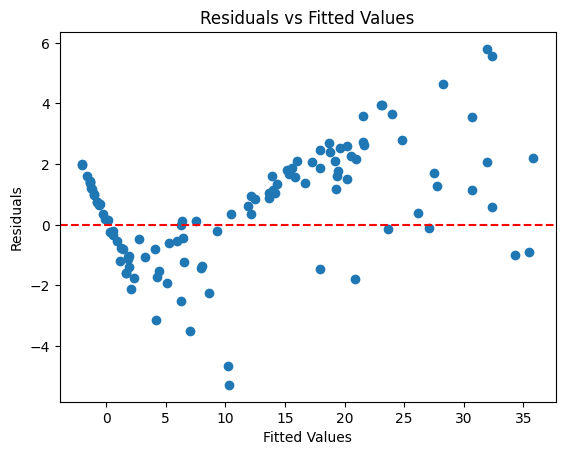

In [89]:
# Plotting residuals vs. fitted values
plt.scatter(pred_mr, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

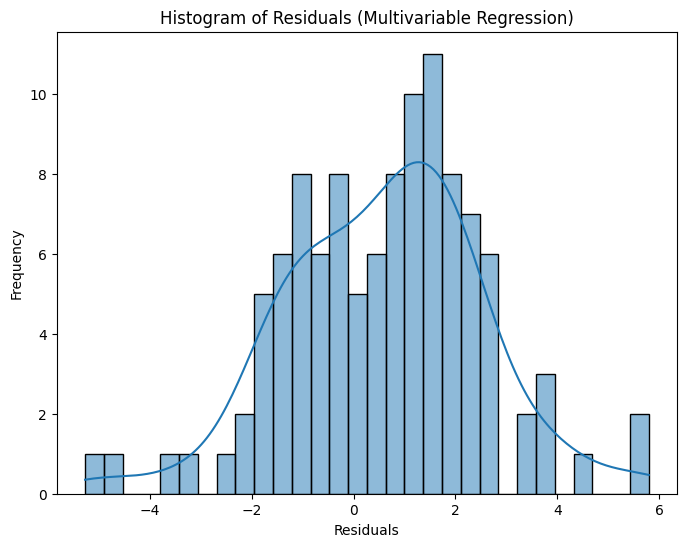

In [113]:
# Plotting histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Multivariable Regression)')
plt.show()

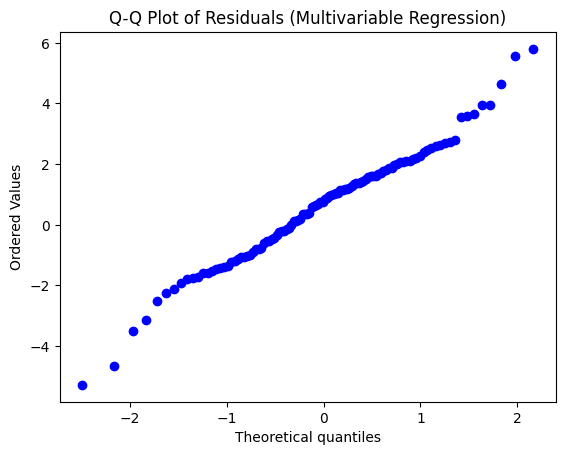

In [116]:
# Plotting Q-Q Plots to check the normality of the residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Multivariable Regression)')
plt.show()

### Polynomial Regression Prediction

In [ ]:
# Make prediction for Polynomial Regression
pred = pd.DataFrame({'TEMP':data_pred['TEMP'], 'RH':data_pred['RH'],
                    'WS':data_pred['WS'], 'RAIN':data_pred['RAIN'],
                    'FFMC':data_pred['FFMC'], 'DMC':data_pred['DMC'],
                    'ISI':data_pred['ISI'], 'BUI':data_pred['BUI']})
new_poly = poly.transform(pred)
predict_poly = poly_model.predict(new_poly)
new_predictions = data_pred.copy()
new_predictions["Predicted FWI"] = predict_poly

# Define the function to categorize FWI
def categorize_fwi(fwi):
    if fwi <= 5:
        return 'Low'
    elif 5 < fwi <= 10:
        return 'Moderate'
    elif 10 < fwi <= 20:
        return 'High'
    elif 20 < fwi <= 30:
        return 'Very High'
    else:
        return 'Extreme'

# Apply the function to create a new column with the FWI Levels
new_predictions['FWI Levels'] = new_predictions['Predicted FWI'].apply(categorize_fwi)

new_predictions.head(10)

,TEMP,RH,WD,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,DSR,Predicted FWI,FWI Levels
0,10.7,50.0,254.0,13.1,6.8,44.2,13.5,456.4,0.1,25.2,0.1,0.0,0.502651,Low
1,13.8,36.0,248.0,34.8,0.2,88.8,23.5,414.7,20.7,41.1,33.3,13.5,32.244712,Extreme
2,12.5,49.0,261.0,33.0,5.2,68.1,16.5,244.7,3.1,28.3,6.3,0.7,6.306191,Moderate
3,12.6,47.0,208.0,20.5,0.3,86.3,44.5,624.4,7.0,75.6,21.4,6.2,21.040927,Very High
4,15.4,34.0,264.0,7.6,0.3,89.5,24.0,191.0,5.8,36.5,12.5,2.4,12.141172,High
5,13.6,35.0,219.0,30.0,0.0,88.9,35.7,477.4,16.4,60.1,34.2,14.1,33.016996,Extreme
6,10.0,48.0,288.0,18.2,20.0,44.3,8.7,437.9,0.2,16.5,0.1,0.0,0.199190,Low
7,11.8,40.0,225.0,14.1,0.5,86.7,26.9,312.5,5.4,44.3,13.1,2.6,12.679305,High
8,13.8,32.0,239.0,20.0,0.0,89.5,32.1,402.6,10.8,53.6,24.3,7.7,23.465082,Very High
9,16.1,28.0,255.0,28.0,0.0,90.5,27.4,360.2,18.8,46.0,33.0,13.3,32.032203,Extreme


In [106]:
# Calculate Residuals
poly_residuals = var_new - predict_poly

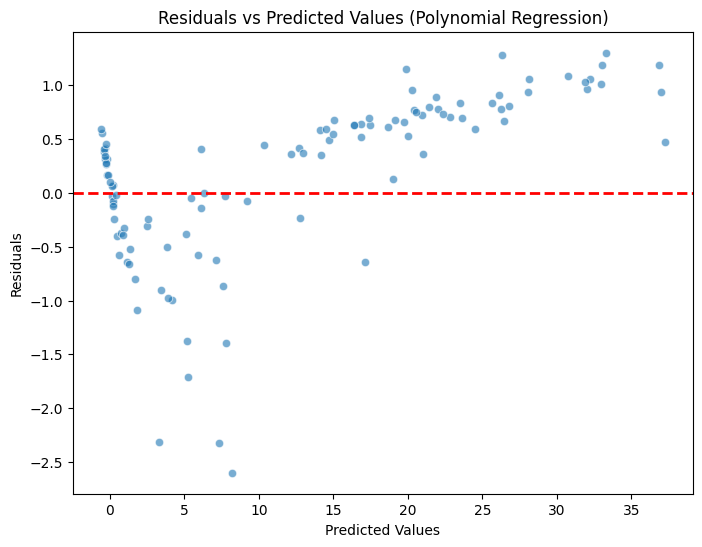

In [107]:
# Plotting residuals vs. fitted values
plt.figure(figsize=(8, 6))
plt.scatter(predict_poly, poly_residuals, alpha=0.6, edgecolors='w', linewidth=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residuals vs Predicted Values (Polynomial Regression)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

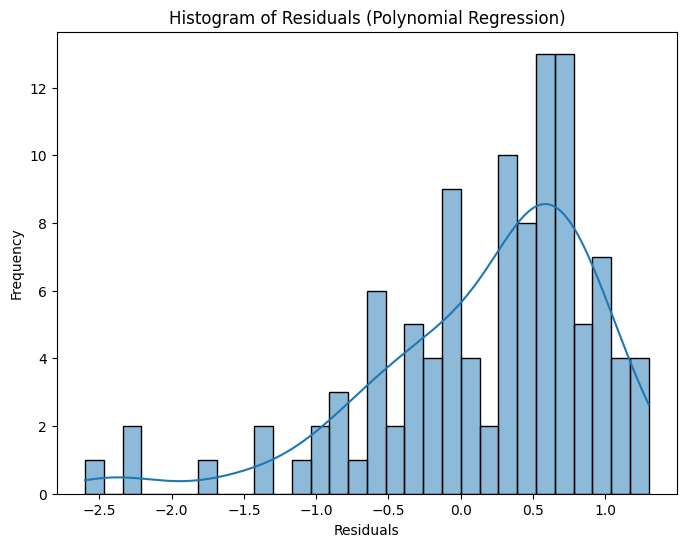

In [112]:
# Plotting histogram
plt.figure(figsize=(8, 6))
sns.histplot(poly_residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals (Polynomial Regression)')
plt.ylabel('Frequency')
plt.show()

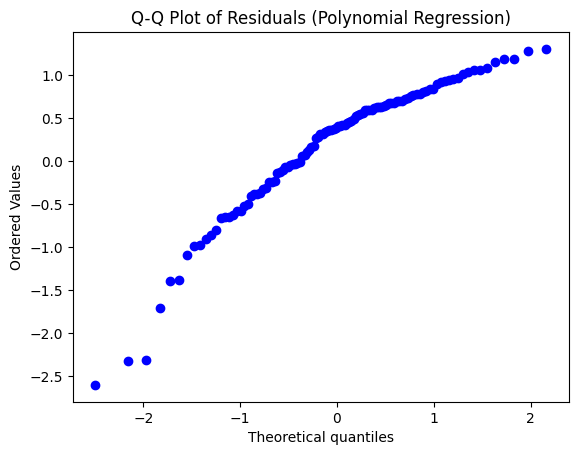

In [115]:
# Plotting Q-Q Plots to check the normality of the residuals
stats.probplot(poly_residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Polynomial Regression)')
plt.show()

### Random Forest Regression Prediction

In [ ]:
# Make prediction for rf regression
rf_preds=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
rf_preds["Predicted FWI"] = rf.predict(rf_preds)
rf_preds.head(10)

c:\Users\tooch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted FWI
0,10.7,50.0,13.1,6.8,44.2,13.5,0.1,25.2,22.2780
1,13.8,36.0,34.8,0.2,88.8,23.5,20.7,41.1,125.3045
2,12.5,49.0,33.0,5.2,68.1,16.5,3.1,28.3,125.3045
3,12.6,47.0,20.5,0.3,86.3,44.5,7.0,75.6,125.3045
4,15.4,34.0,7.6,0.3,89.5,24.0,5.8,36.5,125.3045
5,13.6,35.0,30.0,0.0,88.9,35.7,16.4,60.1,124.1880
6,10.0,48.0,18.2,20.0,44.3,8.7,0.2,16.5,65.4160
7,11.8,40.0,14.1,0.5,86.7,26.9,5.4,44.3,125.3045
8,13.8,32.0,20.0,0.0,89.5,32.1,10.8,53.6,124.1880
9,16.1,28.0,28.0,0.0,90.5,27.4,18.8,46.0,124.1880


### Gradient Boosting Regression Prediction

In [120]:
# Make prediction for gb regression
gb_preds=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
gb_preds["Predicted FWI"] = gb.predict(gb_preds)
gb_preds.head(10)

c:\Users\tooch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted FWI
0,10.7,50.0,13.1,6.8,44.2,13.5,0.1,25.2,23.183078
1,13.8,36.0,34.8,0.2,88.8,23.5,20.7,41.1,130.734573
2,12.5,49.0,33.0,5.2,68.1,16.5,3.1,28.3,130.734573
3,12.6,47.0,20.5,0.3,86.3,44.5,7.0,75.6,130.734573
4,15.4,34.0,7.6,0.3,89.5,24.0,5.8,36.5,130.734573
5,13.6,35.0,30.0,0.0,88.9,35.7,16.4,60.1,129.863521
6,10.0,48.0,18.2,20.0,44.3,8.7,0.2,16.5,67.376132
7,11.8,40.0,14.1,0.5,86.7,26.9,5.4,44.3,130.734573
8,13.8,32.0,20.0,0.0,89.5,32.1,10.8,53.6,129.863521
9,16.1,28.0,28.0,0.0,90.5,27.4,18.8,46.0,129.863521


### Decision Tree Regression Prediction

In [121]:
# Make prediction for random forest regression
dt_preds=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
dt_preds["Predicted FWI"] = dt.predict(dt_preds)
dt_preds.head(10)

c:\Users\tooch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted FWI
0,10.7,50.0,13.1,6.8,44.2,13.5,0.1,25.2,21.8
1,13.8,36.0,34.8,0.2,88.8,23.5,20.7,41.1,133.2
2,12.5,49.0,33.0,5.2,68.1,16.5,3.1,28.3,133.2
3,12.6,47.0,20.5,0.3,86.3,44.5,7.0,75.6,133.2
4,15.4,34.0,7.6,0.3,89.5,24.0,5.8,36.5,133.2
5,13.6,35.0,30.0,0.0,88.9,35.7,16.4,60.1,133.2
6,10.0,48.0,18.2,20.0,44.3,8.7,0.2,16.5,68.4
7,11.8,40.0,14.1,0.5,86.7,26.9,5.4,44.3,133.2
8,13.8,32.0,20.0,0.0,89.5,32.1,10.8,53.6,133.2
9,16.1,28.0,28.0,0.0,90.5,27.4,18.8,46.0,133.2


### KNN Regression Prediction

In [122]:
# Make prediction for random forest regression
knn_preds=pd.DataFrame({"TEMP":data_pred["TEMP"],"RH":data_pred["RH"],"WS":data_pred["WS"],"RAIN":data_pred["RAIN"],
                      "FFMC":data_pred["FFMC"],"DMC":data_pred["DMC"],"ISI":data_pred["ISI"],"BUI":data_pred["BUI"]})
knn_preds["Predicted FWI"] = knn.predict(knn_preds)
knn_preds.head(10)

c:\Users\tooch\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


,TEMP,RH,WS,RAIN,FFMC,DMC,ISI,BUI,Predicted FWI
0,10.7,50.0,13.1,6.8,44.2,13.5,0.1,25.2,12.26
1,13.8,36.0,34.8,0.2,88.8,23.5,20.7,41.1,64.74
2,12.5,49.0,33.0,5.2,68.1,16.5,3.1,28.3,27.34
3,12.6,47.0,20.5,0.3,86.3,44.5,7.0,75.6,43.54
4,15.4,34.0,7.6,0.3,89.5,24.0,5.8,36.5,43.54
5,13.6,35.0,30.0,0.0,88.9,35.7,16.4,60.1,43.54
6,10.0,48.0,18.2,20.0,44.3,8.7,0.2,16.5,15.02
7,11.8,40.0,14.1,0.5,86.7,26.9,5.4,44.3,35.94
8,13.8,32.0,20.0,0.0,89.5,32.1,10.8,53.6,43.54
9,16.1,28.0,28.0,0.0,90.5,27.4,18.8,46.0,43.54


**Conclusion:**

Based on the analysis done above, the best performing model is the Polynomial Regression model with a cross validation score of 99.2%, an R-squared value of 0.994, and Mean Squared Error of 0.584. The output gotten when applied to a new data also shows that it performs accurately as it's predicted values are closer to the actual values compared to the other models.

*THANK YOU!!!*